In [1]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import re
import time

In [2]:
url = 'https://www.flipkart.com/search?q=MOBILE&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=1'

In [3]:
page = requests.get(url)

In [4]:
page.status_code

200

In [5]:
pagecontent = page.text

In [6]:
soup = BeautifulSoup(pagecontent)

In [7]:
for x in soup.find_all('div', attrs={'class' : "_4rR01T"}):
    print(x.text)

SAMSUNG Galaxy F13 (Nightsky Green, 64 GB)
SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)
SAMSUNG Galaxy F04 (Jade Purple, 64 GB)
SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)
POCO C51 (Royal Blue, 64 GB)
POCO C55 (Cool Blue, 128 GB)
POCO C51 (Power Black, 64 GB)
vivo T2x 5G (Glimmer Black, 128 GB)
vivo T2x 5G (Glimmer Black, 128 GB)
vivo T2x 5G (Marine Blue, 128 GB)
vivo T2x 5G (Aurora Gold, 128 GB)
POCO C55 (Forest Green, 128 GB)
POCO C55 (Power Black, 128 GB)
vivo T2x 5G (Aurora Gold, 128 GB)
POCO C50 (Royal Blue, 32 GB)
MOTOROLA G62 5G (Frosted Blue, 128 GB)
OnePlus Nord CE 2 Lite 5G (Blue Tide, 128 GB)
POCO C55 (Cool Blue, 64 GB)
realme C53 (Champion Gold, 64 GB)
POCO C55 (Power Black, 64 GB)
POCO C55 (Forest Green, 64 GB)
Infinix HOT 30i (Marigold, 128 GB)
Infinix HOT 30i (Diamond White, 128 GB)
Infinix HOT 30i (Marigold, 64 GB)


In [8]:
for x in soup.find_all('div', attrs={'class' : "_1_WHN1"}):
    print(x.text)

₹10,999
₹10,999
₹8,499
₹10,999
₹6,499
₹8,999
₹6,499
₹13,999
₹12,999
₹13,999
₹13,999
₹8,999
₹8,999
₹12,999
₹5,499
₹14,999
₹17,738
₹7,499
₹10,999
₹7,499
₹7,499
₹9,039
₹9,039
₹8,199


In [9]:
for x in soup.find_all('div' , attrs={'class':'_3LWZlK'}):
    print(x.text)

4.3
4.3
4.2
4.3
4.1
4.2
4.1
4.4
4.4
4.4
4.4
4.2
4.2
4.4
4.2
4.1
4.4
4.2
4.5
4.2
4.2
4.3
4.3
4.3
4.2
4
5
4.1
4
3
4.5
5
1
4.3
5
2
4.1
5
5


# productname, price ,specifications ,ratings ,pagenum

In [10]:
productname=[]
price=[]
specifications=[]
rating=[]
pagenum=[]



for i in range(1,50):
    start_time = time.time()
    url = 'https://www.flipkart.com/search?q=MOBILE&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={}'.format(i)
    page = requests.get(url)
    pagecontent = page.text
    soup = BeautifulSoup(pagecontent)

    for x in soup.find_all('div', attrs={'class': '_2kHMtA'}):
        pname = x.find('div', attrs={'class' : "_4rR01T"})
        cost = x.find('div', attrs={'class' : "_1_WHN1"})
        features = x.find('ul' , attrs={'class':'_1xgFaf'})
        ratng = x.find('div' , attrs={'class':'_3LWZlK'})


        if pname is None:
            productname.append(np.NaN)
        else:
            productname.append(pname.text)

        if cost is None:
            price.append(np.NaN)
        else:
            price.append(cost.text)

        if features is None:
            specifications.append(np.NaN)
        else:
            specifications.append(features.text)

        if ratng is None:
            rating.append(np.NaN)
        else:
            rating.append(ratng.text)

        pagenum.append(i)

    print('Page {} completed in {} seconds'.format(i, time.time() -  start_time))

Page 1 completed in 2.0211331844329834 seconds
Page 2 completed in 2.163071632385254 seconds
Page 3 completed in 2.058645248413086 seconds
Page 4 completed in 2.1141862869262695 seconds
Page 5 completed in 2.995312213897705 seconds
Page 6 completed in 2.3290152549743652 seconds
Page 7 completed in 2.4004368782043457 seconds
Page 8 completed in 2.25630521774292 seconds
Page 9 completed in 1.8525278568267822 seconds
Page 10 completed in 1.8888206481933594 seconds
Page 11 completed in 1.7052698135375977 seconds
Page 12 completed in 2.1462862491607666 seconds
Page 13 completed in 1.8168659210205078 seconds
Page 14 completed in 1.9404511451721191 seconds
Page 15 completed in 1.8718087673187256 seconds
Page 16 completed in 2.014566659927368 seconds
Page 17 completed in 1.7714874744415283 seconds
Page 18 completed in 1.8611102104187012 seconds
Page 19 completed in 2.2954318523406982 seconds
Page 20 completed in 1.8830690383911133 seconds
Page 21 completed in 1.94996976852417 seconds
Page 22 c

In [11]:
len(productname)

984

In [12]:
mobile_df = pd.DataFrame({'productname':productname , 'price': price , 'specifications': specifications , 'rating':rating , 'pagenumber': pagenum})

In [13]:
mobile_df.head()

,productname,price,specifications,rating,pagenumber
0,"SAMSUNG Galaxy F13 (Nightsky Green, 64 GB)","₹10,999",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,4.3,1
1,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)","₹10,999",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,4.3,1
2,"SAMSUNG Galaxy F04 (Jade Purple, 64 GB)","₹8,499",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,4.2,1
3,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)","₹10,999",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,4.3,1
4,"POCO C51 (Royal Blue, 64 GB)","₹6,499",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,4.1,1


In [14]:
mobile_df['productname'].unique()

array(['SAMSUNG Galaxy F13 (Nightsky Green, 64 GB)',
       'SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)',
       'SAMSUNG Galaxy F04 (Jade Purple, 64 GB)',
       'SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)',
       'POCO C51 (Royal Blue, 64 GB)', 'POCO C55 (Cool Blue, 128 GB)',
       'POCO C51 (Power Black, 64 GB)',
       'vivo T2x 5G (Glimmer Black, 128 GB)',
       'vivo T2x 5G (Marine Blue, 128 GB)',
       'vivo T2x 5G (Aurora Gold, 128 GB)',
       'POCO C55 (Forest Green, 128 GB)',
       'POCO C55 (Power Black, 128 GB)', 'POCO C50 (Royal Blue, 32 GB)',
       'MOTOROLA G62 5G (Frosted Blue, 128 GB)',
       'OnePlus Nord CE 2 Lite 5G (Blue Tide, 128 GB)',
       'POCO C55 (Cool Blue, 64 GB)', 'realme C53 (Champion Gold, 64 GB)',
       'POCO C55 (Power Black, 64 GB)', 'POCO C55 (Forest Green, 64 GB)',
       'Infinix HOT 30i (Marigold, 128 GB)',
       'Infinix HOT 30i (Diamond White, 128 GB)',
       'Infinix HOT 30i (Marigold, 64 GB)',
       'Infinix HOT 30i (Diamond White

In [15]:
mobile_df.tail()

,productname,price,specifications,rating,pagenumber
979,"vivo T1 Pro 5G (Turbo Cyan, 128 GB)","₹23,999",6 GB RAM | 128 GB ROM16.36 cm (6.44 inch) Full...,4.4,41
980,KARBONN KU3+,₹999,32 MB RAM | 32 MB ROM6.1 cm (2.4 inch) Display...,NaN,41
981,"LAVA Blaze 1X 5G (Glass Green, 128 GB)","₹13,749",6 GB RAM | 128 GB ROM16.51 cm (6.5 inch) Displ...,4.2,41
982,Good One G115,"₹1,049",32 MB RAM | 32 MB ROM | Expandable Upto 32 GB3...,3.6,41
983,"REDMI 12C (Royal Blue, 6 GB)","₹11,499",128 GB RAM | 6 GB ROM17.04 cm (6.71 inch) Disp...,3.5,41


In [16]:
mobile_df['productname'] = mobile_df['productname'].apply(lambda x: ''.join(x))

In [17]:
mobile_df['price'] = mobile_df['price'].apply(lambda x: ''.join(x))

In [18]:
mobile_df.to_csv('mobile_df.csv')

In [19]:
mobile_df['productname'][5]

'POCO C55 (Cool Blue, 128 GB)'

In [20]:
mobile_df['specifications'][0]

'4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16.76 cm (6.6 inch) Full HD+ Display50MP + 5MP + 2MP | 8MP Front Camera6000 mAh Lithium Ion BatteryExynos 850 Processor1 Year Warranty Provided By the Manufacturer from Date of Purchase'

In [21]:
# extract brand
regex = r'^\w+'
mobile_df['brand']= mobile_df['productname'].apply(lambda x: re.compile(regex).findall(x))

In [22]:
mobile_df.tail()

,productname,price,specifications,rating,pagenumber,brand
979,"vivo T1 Pro 5G (Turbo Cyan, 128 GB)","₹23,999",6 GB RAM | 128 GB ROM16.36 cm (6.44 inch) Full...,4.4,41,[vivo]
980,KARBONN KU3+,₹999,32 MB RAM | 32 MB ROM6.1 cm (2.4 inch) Display...,NaN,41,[KARBONN]
981,"LAVA Blaze 1X 5G (Glass Green, 128 GB)","₹13,749",6 GB RAM | 128 GB ROM16.51 cm (6.5 inch) Displ...,4.2,41,[LAVA]
982,Good One G115,"₹1,049",32 MB RAM | 32 MB ROM | Expandable Upto 32 GB3...,3.6,41,[Good]
983,"REDMI 12C (Royal Blue, 6 GB)","₹11,499",128 GB RAM | 6 GB ROM17.04 cm (6.71 inch) Disp...,3.5,41,[REDMI]


In [23]:
# extract RAM
regex = r'[0-9]+\s(?:MB|GB)\s+RAM'
mobile_df['RAM']= mobile_df['specifications'].apply(lambda x: re.compile(regex).findall(x))

In [24]:
mobile_df.tail()

,productname,price,specifications,rating,pagenumber,brand,RAM
979,"vivo T1 Pro 5G (Turbo Cyan, 128 GB)","₹23,999",6 GB RAM | 128 GB ROM16.36 cm (6.44 inch) Full...,4.4,41,[vivo],[6 GB RAM]
980,KARBONN KU3+,₹999,32 MB RAM | 32 MB ROM6.1 cm (2.4 inch) Display...,NaN,41,[KARBONN],[32 MB RAM]
981,"LAVA Blaze 1X 5G (Glass Green, 128 GB)","₹13,749",6 GB RAM | 128 GB ROM16.51 cm (6.5 inch) Displ...,4.2,41,[LAVA],[6 GB RAM]
982,Good One G115,"₹1,049",32 MB RAM | 32 MB ROM | Expandable Upto 32 GB3...,3.6,41,[Good],[32 MB RAM]
983,"REDMI 12C (Royal Blue, 6 GB)","₹11,499",128 GB RAM | 6 GB ROM17.04 cm (6.71 inch) Disp...,3.5,41,[REDMI],[128 GB RAM]


In [25]:
# extract storage
regex = r'[0-9\s]+(?:MB|GB)\s+ROM'
mobile_df['storage']= mobile_df['specifications'].apply(lambda x: re.compile(regex).findall(x))

In [26]:
mobile_df.tail()

,productname,price,specifications,rating,pagenumber,brand,RAM,storage
979,"vivo T1 Pro 5G (Turbo Cyan, 128 GB)","₹23,999",6 GB RAM | 128 GB ROM16.36 cm (6.44 inch) Full...,4.4,41,[vivo],[6 GB RAM],[ 128 GB ROM]
980,KARBONN KU3+,₹999,32 MB RAM | 32 MB ROM6.1 cm (2.4 inch) Display...,NaN,41,[KARBONN],[32 MB RAM],[ 32 MB ROM]
981,"LAVA Blaze 1X 5G (Glass Green, 128 GB)","₹13,749",6 GB RAM | 128 GB ROM16.51 cm (6.5 inch) Displ...,4.2,41,[LAVA],[6 GB RAM],[ 128 GB ROM]
982,Good One G115,"₹1,049",32 MB RAM | 32 MB ROM | Expandable Upto 32 GB3...,3.6,41,[Good],[32 MB RAM],[ 32 MB ROM]
983,"REDMI 12C (Royal Blue, 6 GB)","₹11,499",128 GB RAM | 6 GB ROM17.04 cm (6.71 inch) Disp...,3.5,41,[REDMI],[128 GB RAM],[ 6 GB ROM]


In [27]:
# extract colour
regex = r'\w+,'
mobile_df['colour']= mobile_df['productname'].apply(lambda x: re.compile(regex).findall(x))

In [28]:
mobile_df.tail()

,productname,price,specifications,rating,pagenumber,brand,RAM,storage,colour
979,"vivo T1 Pro 5G (Turbo Cyan, 128 GB)","₹23,999",6 GB RAM | 128 GB ROM16.36 cm (6.44 inch) Full...,4.4,41,[vivo],[6 GB RAM],[ 128 GB ROM],"[Cyan,]"
980,KARBONN KU3+,₹999,32 MB RAM | 32 MB ROM6.1 cm (2.4 inch) Display...,NaN,41,[KARBONN],[32 MB RAM],[ 32 MB ROM],[]
981,"LAVA Blaze 1X 5G (Glass Green, 128 GB)","₹13,749",6 GB RAM | 128 GB ROM16.51 cm (6.5 inch) Displ...,4.2,41,[LAVA],[6 GB RAM],[ 128 GB ROM],"[Green,]"
982,Good One G115,"₹1,049",32 MB RAM | 32 MB ROM | Expandable Upto 32 GB3...,3.6,41,[Good],[32 MB RAM],[ 32 MB ROM],[]
983,"REDMI 12C (Royal Blue, 6 GB)","₹11,499",128 GB RAM | 6 GB ROM17.04 cm (6.71 inch) Disp...,3.5,41,[REDMI],[128 GB RAM],[ 6 GB ROM],"[Blue,]"


In [29]:
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   productname     984 non-null    object
 1   price           984 non-null    object
 2   specifications  984 non-null    object
 3   rating          964 non-null    object
 4   pagenumber      984 non-null    int64 
 5   brand           984 non-null    object
 6   RAM             984 non-null    object
 7   storage         984 non-null    object
 8   colour          984 non-null    object
dtypes: int64(1), object(8)
memory usage: 69.3+ KB


In [30]:
mobile_df.isnull().sum()

productname        0
price              0
specifications     0
rating            20
pagenumber         0
brand              0
RAM                0
storage            0
colour             0
dtype: int64

In [31]:
mobile_df['brand'] = mobile_df['brand'].apply(lambda x: ''.join(x))
mobile_df['RAM'] = mobile_df['RAM'].apply(lambda x: ''.join(x))
mobile_df['storage'] = mobile_df['storage'].apply(lambda x: ''.join(x))
mobile_df['colour'] = mobile_df['colour'].apply(lambda x : ''.join(x))
mobile_df['price'] = mobile_df['price'].apply(lambda x: x.replace('₹','').replace(",",'')).astype(float)
mobile_df['colour'] = mobile_df['colour'].apply(lambda x: x.replace(',',''))

In [32]:
mobile_df.tail()

,productname,price,specifications,rating,pagenumber,brand,RAM,storage,colour
979,"vivo T1 Pro 5G (Turbo Cyan, 128 GB)",23999.0,6 GB RAM | 128 GB ROM16.36 cm (6.44 inch) Full...,4.4,41,vivo,6 GB RAM,128 GB ROM,Cyan
980,KARBONN KU3+,999.0,32 MB RAM | 32 MB ROM6.1 cm (2.4 inch) Display...,NaN,41,KARBONN,32 MB RAM,32 MB ROM,
981,"LAVA Blaze 1X 5G (Glass Green, 128 GB)",13749.0,6 GB RAM | 128 GB ROM16.51 cm (6.5 inch) Displ...,4.2,41,LAVA,6 GB RAM,128 GB ROM,Green
982,Good One G115,1049.0,32 MB RAM | 32 MB ROM | Expandable Upto 32 GB3...,3.6,41,Good,32 MB RAM,32 MB ROM,
983,"REDMI 12C (Royal Blue, 6 GB)",11499.0,128 GB RAM | 6 GB ROM17.04 cm (6.71 inch) Disp...,3.5,41,REDMI,128 GB RAM,6 GB ROM,Blue


In [33]:
mobile_df.isnull().sum()

productname        0
price              0
specifications     0
rating            20
pagenumber         0
brand              0
RAM                0
storage            0
colour             0
dtype: int64

In [34]:
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   productname     984 non-null    object 
 1   price           984 non-null    float64
 2   specifications  984 non-null    object 
 3   rating          964 non-null    object 
 4   pagenumber      984 non-null    int64  
 5   brand           984 non-null    object 
 6   RAM             984 non-null    object 
 7   storage         984 non-null    object 
 8   colour          984 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 69.3+ KB


In [35]:
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   productname     984 non-null    object 
 1   price           984 non-null    float64
 2   specifications  984 non-null    object 
 3   rating          964 non-null    object 
 4   pagenumber      984 non-null    int64  
 5   brand           984 non-null    object 
 6   RAM             984 non-null    object 
 7   storage         984 non-null    object 
 8   colour          984 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 69.3+ KB


In [36]:
mobile_df = mobile_df.fillna(0)

In [37]:
mobile_df.tail()

,productname,price,specifications,rating,pagenumber,brand,RAM,storage,colour
979,"vivo T1 Pro 5G (Turbo Cyan, 128 GB)",23999.0,6 GB RAM | 128 GB ROM16.36 cm (6.44 inch) Full...,4.4,41,vivo,6 GB RAM,128 GB ROM,Cyan
980,KARBONN KU3+,999.0,32 MB RAM | 32 MB ROM6.1 cm (2.4 inch) Display...,0,41,KARBONN,32 MB RAM,32 MB ROM,
981,"LAVA Blaze 1X 5G (Glass Green, 128 GB)",13749.0,6 GB RAM | 128 GB ROM16.51 cm (6.5 inch) Displ...,4.2,41,LAVA,6 GB RAM,128 GB ROM,Green
982,Good One G115,1049.0,32 MB RAM | 32 MB ROM | Expandable Upto 32 GB3...,3.6,41,Good,32 MB RAM,32 MB ROM,
983,"REDMI 12C (Royal Blue, 6 GB)",11499.0,128 GB RAM | 6 GB ROM17.04 cm (6.71 inch) Disp...,3.5,41,REDMI,128 GB RAM,6 GB ROM,Blue


In [38]:
mobile_df = mobile_df.replace(r'^\s*$', np.nan, regex=True)

In [39]:
mobile_df.tail()

,productname,price,specifications,rating,pagenumber,brand,RAM,storage,colour
979,"vivo T1 Pro 5G (Turbo Cyan, 128 GB)",23999.0,6 GB RAM | 128 GB ROM16.36 cm (6.44 inch) Full...,4.4,41,vivo,6 GB RAM,128 GB ROM,Cyan
980,KARBONN KU3+,999.0,32 MB RAM | 32 MB ROM6.1 cm (2.4 inch) Display...,0,41,KARBONN,32 MB RAM,32 MB ROM,NaN
981,"LAVA Blaze 1X 5G (Glass Green, 128 GB)",13749.0,6 GB RAM | 128 GB ROM16.51 cm (6.5 inch) Displ...,4.2,41,LAVA,6 GB RAM,128 GB ROM,Green
982,Good One G115,1049.0,32 MB RAM | 32 MB ROM | Expandable Upto 32 GB3...,3.6,41,Good,32 MB RAM,32 MB ROM,NaN
983,"REDMI 12C (Royal Blue, 6 GB)",11499.0,128 GB RAM | 6 GB ROM17.04 cm (6.71 inch) Disp...,3.5,41,REDMI,128 GB RAM,6 GB ROM,Blue


In [40]:
mobile_df = mobile_df.fillna(0)

In [41]:
mobile_df.tail()

,productname,price,specifications,rating,pagenumber,brand,RAM,storage,colour
979,"vivo T1 Pro 5G (Turbo Cyan, 128 GB)",23999.0,6 GB RAM | 128 GB ROM16.36 cm (6.44 inch) Full...,4.4,41,vivo,6 GB RAM,128 GB ROM,Cyan
980,KARBONN KU3+,999.0,32 MB RAM | 32 MB ROM6.1 cm (2.4 inch) Display...,0,41,KARBONN,32 MB RAM,32 MB ROM,0
981,"LAVA Blaze 1X 5G (Glass Green, 128 GB)",13749.0,6 GB RAM | 128 GB ROM16.51 cm (6.5 inch) Displ...,4.2,41,LAVA,6 GB RAM,128 GB ROM,Green
982,Good One G115,1049.0,32 MB RAM | 32 MB ROM | Expandable Upto 32 GB3...,3.6,41,Good,32 MB RAM,32 MB ROM,0
983,"REDMI 12C (Royal Blue, 6 GB)",11499.0,128 GB RAM | 6 GB ROM17.04 cm (6.71 inch) Disp...,3.5,41,REDMI,128 GB RAM,6 GB ROM,Blue


In [42]:
mobile_df.isnull().sum()

productname       0
price             0
specifications    0
rating            0
pagenumber        0
brand             0
RAM               0
storage           0
colour            0
dtype: int64

In [43]:
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   productname     984 non-null    object 
 1   price           984 non-null    float64
 2   specifications  984 non-null    object 
 3   rating          984 non-null    object 
 4   pagenumber      984 non-null    int64  
 5   brand           984 non-null    object 
 6   RAM             984 non-null    object 
 7   storage         984 non-null    object 
 8   colour          984 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 69.3+ KB


In [44]:
mobile_df['rating'] = mobile_df['rating'].astype(float)

In [45]:
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   productname     984 non-null    object 
 1   price           984 non-null    float64
 2   specifications  984 non-null    object 
 3   rating          984 non-null    float64
 4   pagenumber      984 non-null    int64  
 5   brand           984 non-null    object 
 6   RAM             984 non-null    object 
 7   storage         984 non-null    object 
 8   colour          984 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 69.3+ KB


In [46]:
# measure of central tendency
mobile_df.describe()

,price,rating,pagenumber
count,984.000000,984.000000,984.000000
mean,11392.721545,4.011382,21.000000
std,12703.042511,0.647896,11.838176
min,620.000000,0.000000,1.000000
25%,1340.000000,4.000000,11.000000
50%,8494.000000,4.100000,21.000000
75%,15900.000000,4.300000,31.000000
max,78999.000000,4.900000,41.000000


In [47]:
mobile_df['brand'] = mobile_df['brand'].apply(lambda x: x.replace('LAVA','Lava').replace('REDMI','Redmi').replace('MOTOROLA','Motorola').replace('Mi','Redmi').replace('Motorola','Moto').replace('Xiaomi','Redmi'))

In [48]:
mobile_df

,productname,price,specifications,rating,pagenumber,brand,RAM,storage,colour
0,"SAMSUNG Galaxy F13 (Nightsky Green, 64 GB)",10999.0,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,4.3,1,SAMSUNG,4 GB RAM,64 GB ROM,Green
1,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",10999.0,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,4.3,1,SAMSUNG,4 GB RAM,64 GB ROM,Copper
2,"SAMSUNG Galaxy F04 (Jade Purple, 64 GB)",8499.0,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,4.2,1,SAMSUNG,4 GB RAM,64 GB ROM,Purple
3,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)",10999.0,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,4.3,1,SAMSUNG,4 GB RAM,64 GB ROM,Blue
4,"POCO C51 (Royal Blue, 64 GB)",6499.0,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,4.1,1,POCO,4 GB RAM,64 GB ROM,Blue
...,...,...,...,...,...,...,...,...,...
979,"vivo T1 Pro 5G (Turbo Cyan, 128 GB)",23999.0,6 GB RAM | 128 GB ROM16.36 cm (6.44 inch) Full...,4.4,41,vivo,6 GB RAM,128 GB ROM,Cyan
980,KARBONN KU3+,999.0,32 MB RAM | 32 MB ROM6.1 cm (2.4 inch) Display...,0.0,41,KARBONN,32 MB RAM,32 MB ROM,0
981,"LAVA Blaze 1X 5G (Glass Green, 128 GB)",13749.0,6 GB RAM | 128 GB ROM16.51 cm (6.5 inch) Displ...,4.2,41,Lava,6 GB RAM,128 GB ROM,Green
982,Good One G115,1049.0,32 MB RAM | 32 MB ROM | Expandable Upto 32 GB3...,3.6,41,Good,32 MB RAM,32 MB ROM,0


# removing outliers

In [49]:
mobile_df.describe()

,price,rating,pagenumber
count,984.000000,984.000000,984.000000
mean,11392.721545,4.011382,21.000000
std,12703.042511,0.647896,11.838176
min,620.000000,0.000000,1.000000
25%,1340.000000,4.000000,11.000000
50%,8494.000000,4.100000,21.000000
75%,15900.000000,4.300000,31.000000
max,78999.000000,4.900000,41.000000


In [50]:
min_thresold = mobile_df.price.quantile(0.20)
min_thresold

1179.6000000000004

In [51]:
mobile_df = mobile_df[(mobile_df.price>min_thresold)]

In [52]:
mobile_df.tail()

,productname,price,specifications,rating,pagenumber,brand,RAM,storage,colour
976,SAREGAMA Carvaan Mobile Hindi Don M12 with 100...,1662.0,32 MB RAM | 1.3 GB ROM4.57 cm (1.8 inch) Displ...,4.0,41,SAREGAMA,32 MB RAM,3 GB ROM,0
978,"APPLE iPhone 14 ((PRODUCT)RED, 128 GB)",67999.0,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,4.6,41,APPLE,0,128 GB ROM,RED
979,"vivo T1 Pro 5G (Turbo Cyan, 128 GB)",23999.0,6 GB RAM | 128 GB ROM16.36 cm (6.44 inch) Full...,4.4,41,vivo,6 GB RAM,128 GB ROM,Cyan
981,"LAVA Blaze 1X 5G (Glass Green, 128 GB)",13749.0,6 GB RAM | 128 GB ROM16.51 cm (6.5 inch) Displ...,4.2,41,Lava,6 GB RAM,128 GB ROM,Green
983,"REDMI 12C (Royal Blue, 6 GB)",11499.0,128 GB RAM | 6 GB ROM17.04 cm (6.71 inch) Disp...,3.5,41,Redmi,128 GB RAM,6 GB ROM,Blue


In [53]:
mobile_df.reset_index(inplace=True)

In [54]:
mobile_df

,index,productname,price,specifications,rating,pagenumber,brand,RAM,storage,colour
0,0,"SAMSUNG Galaxy F13 (Nightsky Green, 64 GB)",10999.0,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,4.3,1,SAMSUNG,4 GB RAM,64 GB ROM,Green
1,1,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",10999.0,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,4.3,1,SAMSUNG,4 GB RAM,64 GB ROM,Copper
2,2,"SAMSUNG Galaxy F04 (Jade Purple, 64 GB)",8499.0,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,4.2,1,SAMSUNG,4 GB RAM,64 GB ROM,Purple
3,3,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)",10999.0,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,4.3,1,SAMSUNG,4 GB RAM,64 GB ROM,Blue
4,4,"POCO C51 (Royal Blue, 64 GB)",6499.0,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,4.1,1,POCO,4 GB RAM,64 GB ROM,Blue
...,...,...,...,...,...,...,...,...,...,...
782,976,SAREGAMA Carvaan Mobile Hindi Don M12 with 100...,1662.0,32 MB RAM | 1.3 GB ROM4.57 cm (1.8 inch) Displ...,4.0,41,SAREGAMA,32 MB RAM,3 GB ROM,0
783,978,"APPLE iPhone 14 ((PRODUCT)RED, 128 GB)",67999.0,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,4.6,41,APPLE,0,128 GB ROM,RED
784,979,"vivo T1 Pro 5G (Turbo Cyan, 128 GB)",23999.0,6 GB RAM | 128 GB ROM16.36 cm (6.44 inch) Full...,4.4,41,vivo,6 GB RAM,128 GB ROM,Cyan
785,981,"LAVA Blaze 1X 5G (Glass Green, 128 GB)",13749.0,6 GB RAM | 128 GB ROM16.51 cm (6.5 inch) Displ...,4.2,41,Lava,6 GB RAM,128 GB ROM,Green


# EDA

# univariate analysis

<Axes: xlabel='brand'>

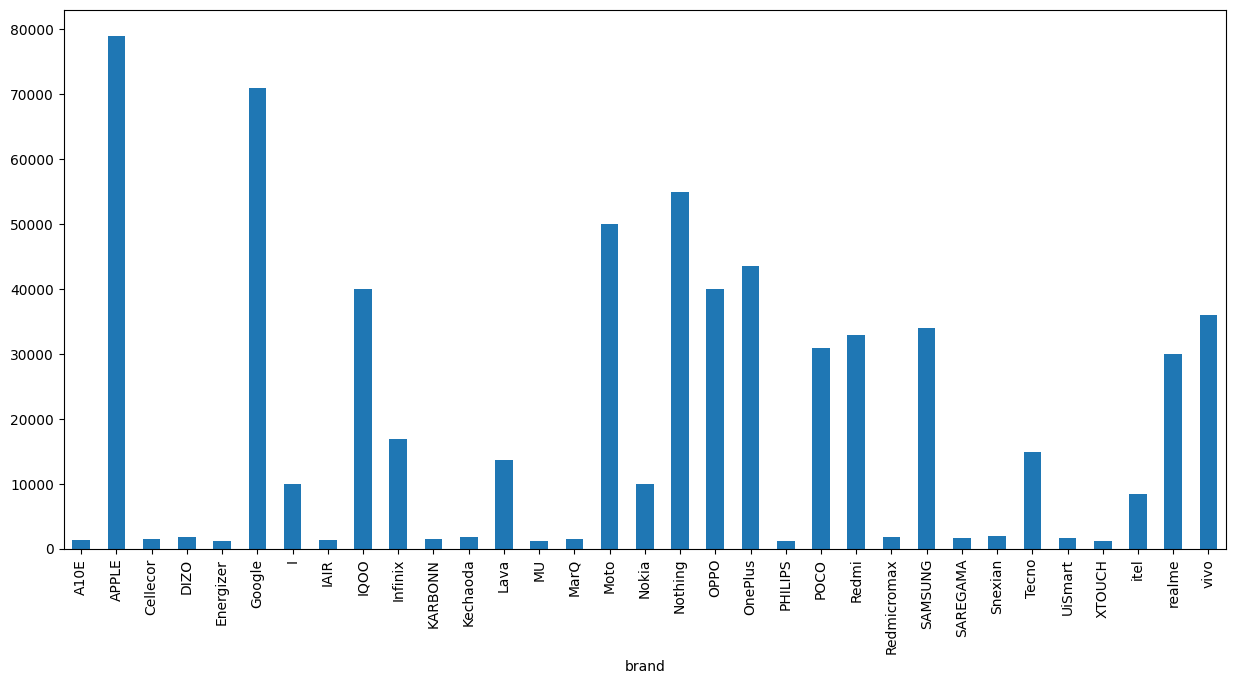

In [55]:
plt.figure(figsize=(15, 7))
mobile_df.groupby(['brand'])['price'].max().plot(kind = 'bar')

<Axes: >

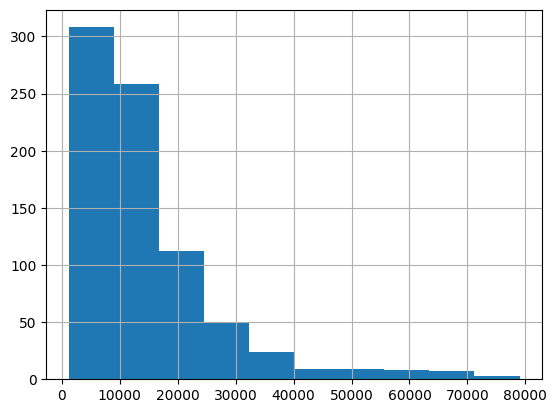

In [56]:
mobile_df['price'].hist()

<Axes: xlabel='brand', ylabel='count'>

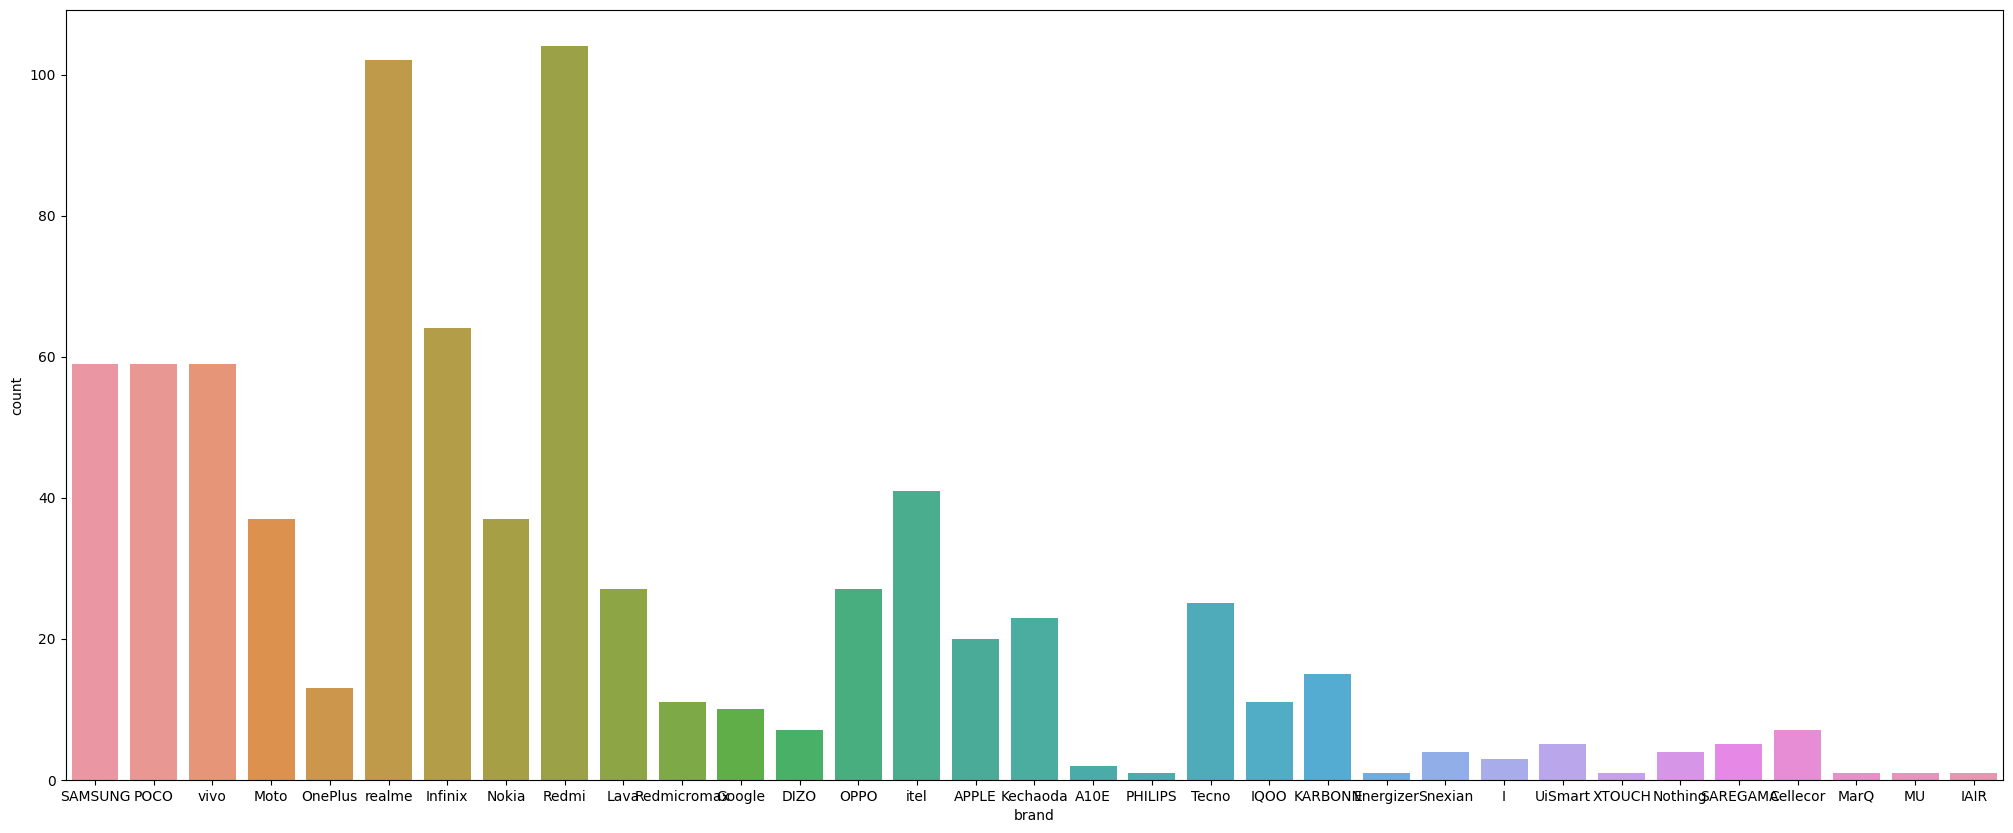

In [58]:
plt.figure(figsize=(25,10))
sns.countplot(data = mobile_df, x='brand')

<Axes: xlabel='rating', ylabel='count'>

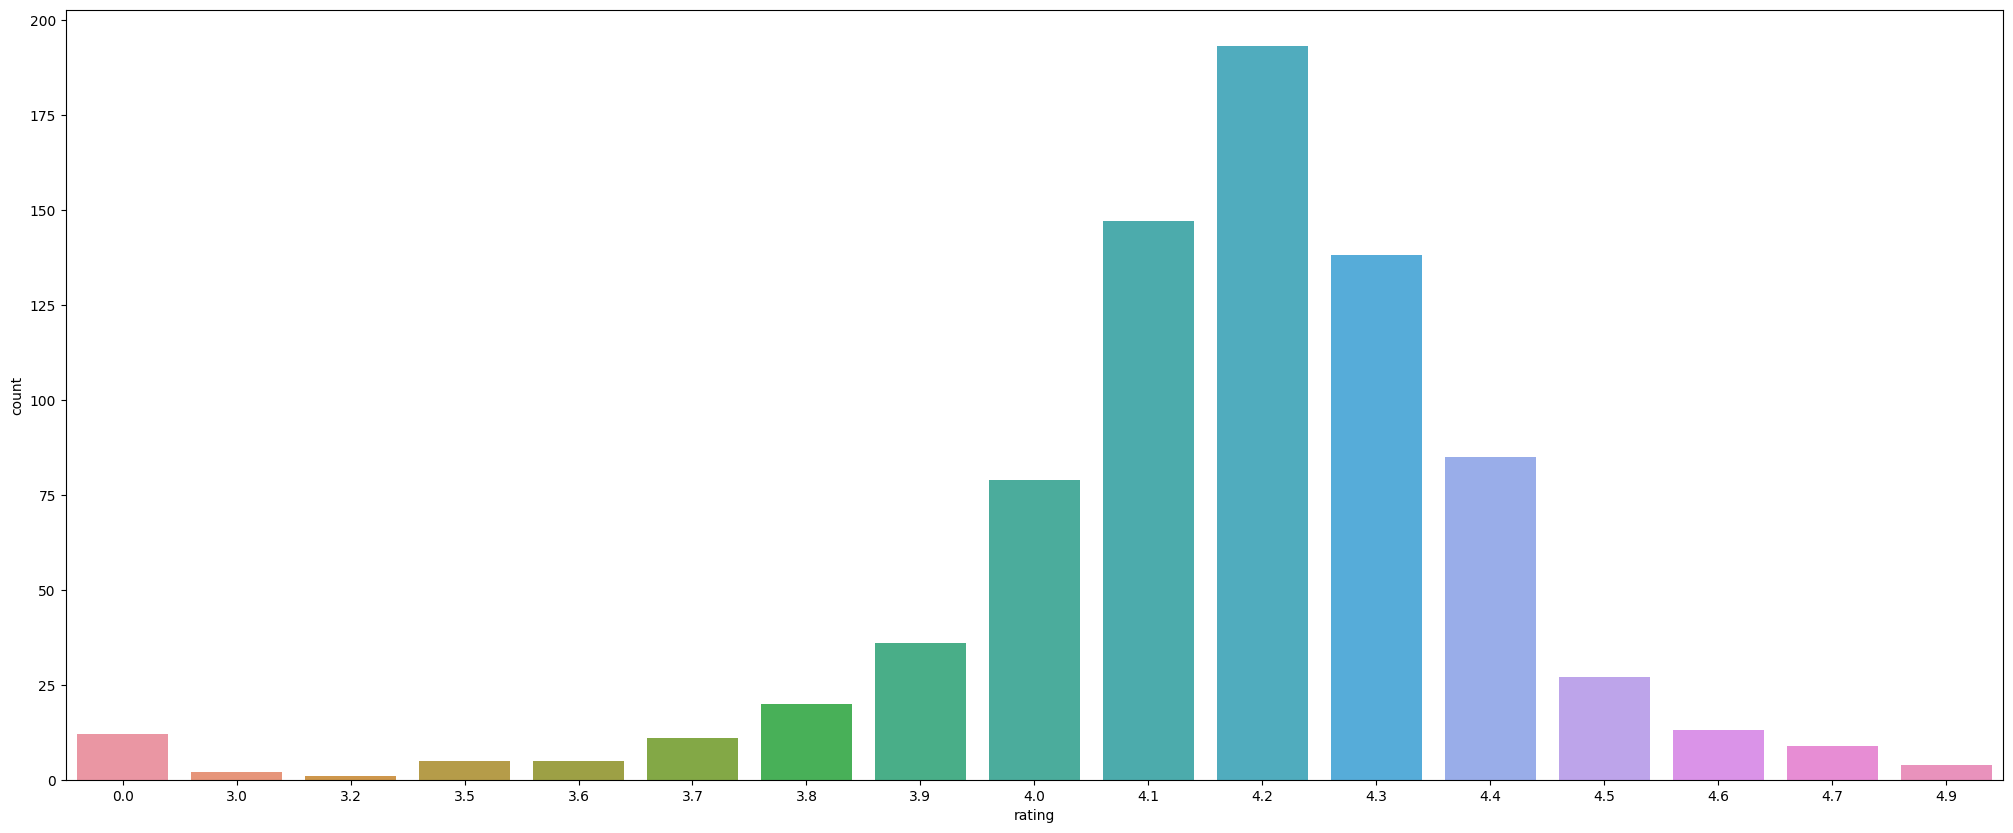

In [59]:
plt.figure(figsize=(25,10))
sns.countplot(data=mobile_df, x = 'rating')

<Axes: ylabel='price'>

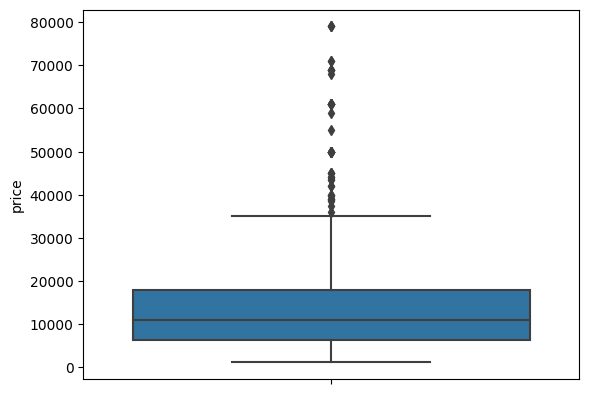

In [60]:
sns.boxplot(y=mobile_df['price'])

<Axes: ylabel='rating'>

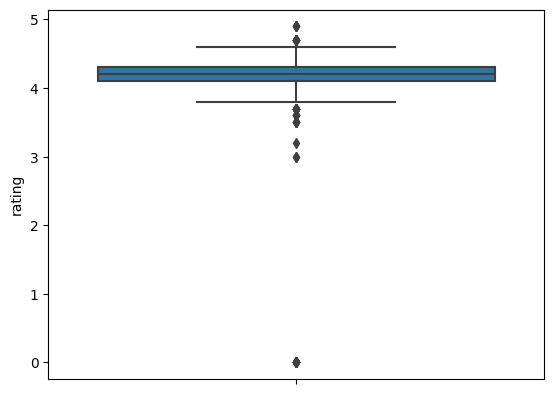

In [61]:
sns.boxplot(y=mobile_df['rating'])

# multivariate

<Axes: xlabel='brand', ylabel='price'>

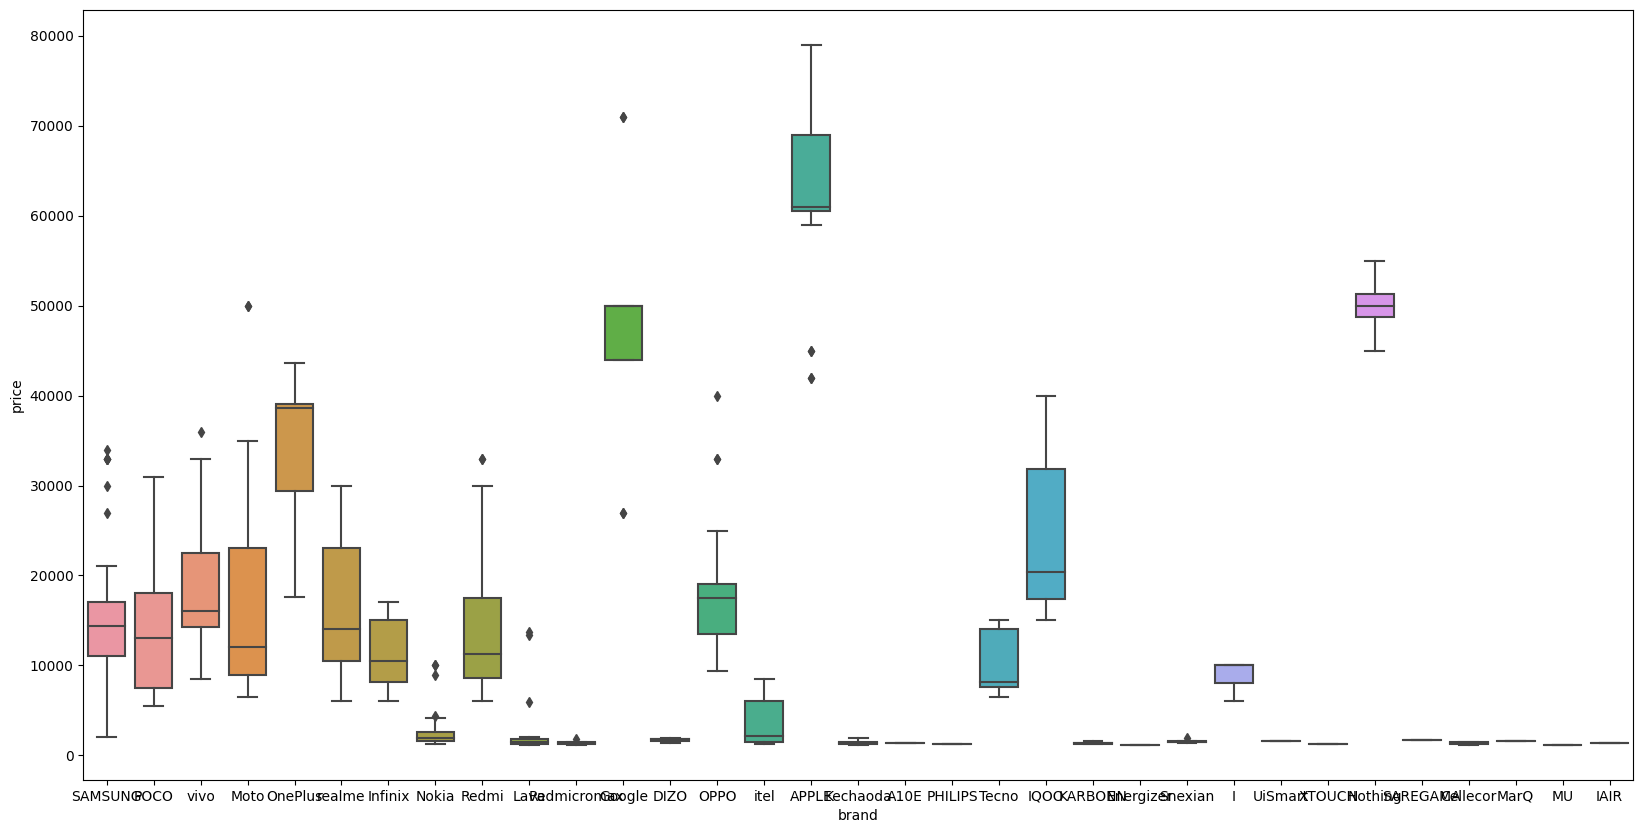

In [62]:
plt.figure(figsize=(20,10))
sns.boxplot(x = mobile_df.brand, y = mobile_df.price)

<Axes: xlabel='brand', ylabel='rating'>

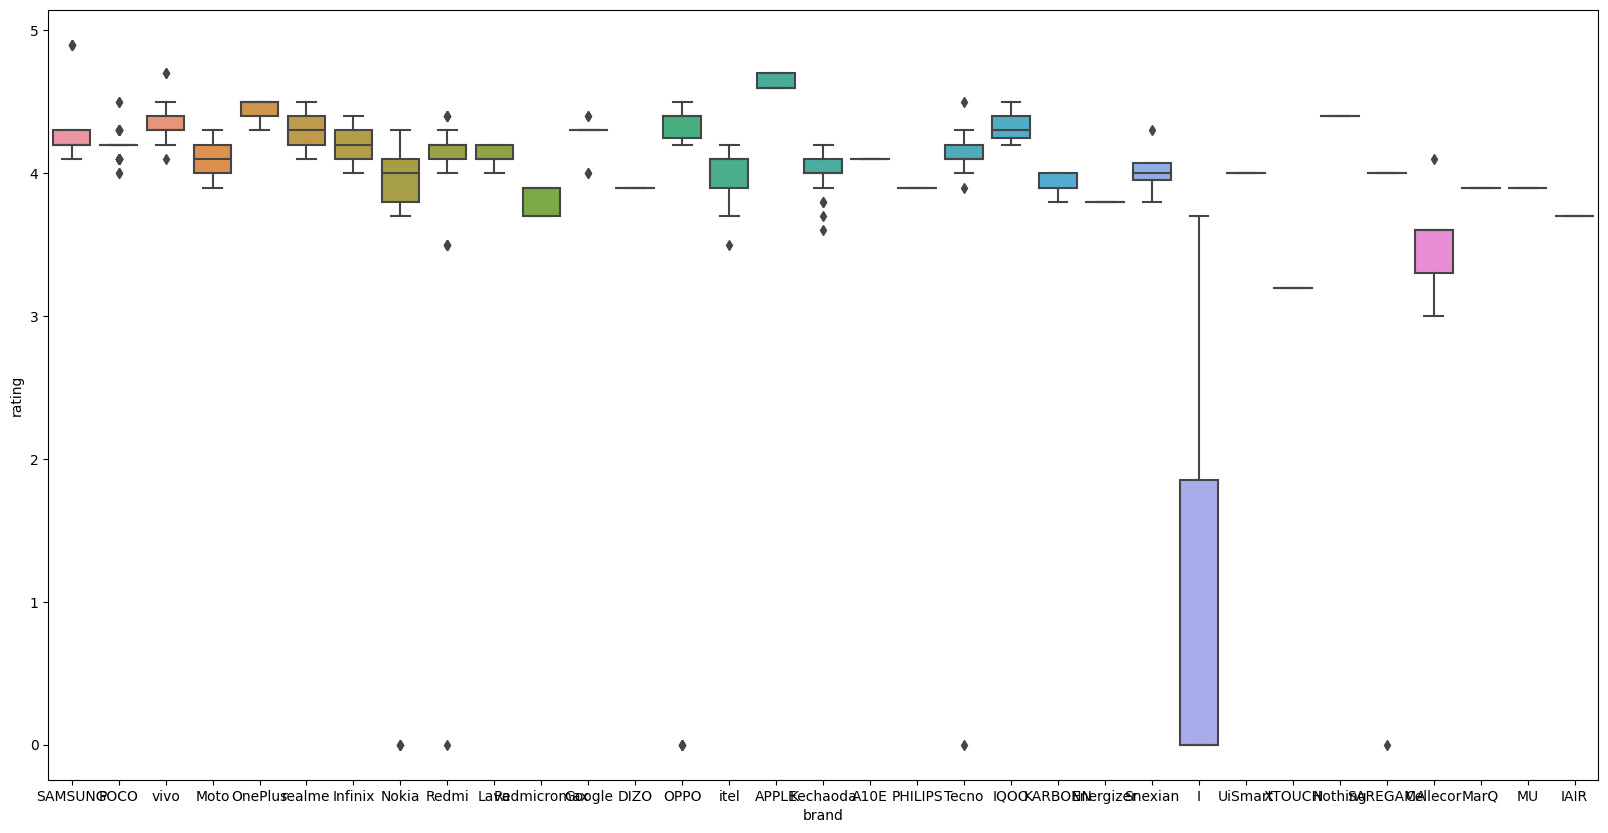

In [63]:
plt.figure(figsize=(20,10))
sns.boxplot(x = mobile_df.brand, y = mobile_df.rating)

<Axes: xlabel='brand', ylabel='price'>

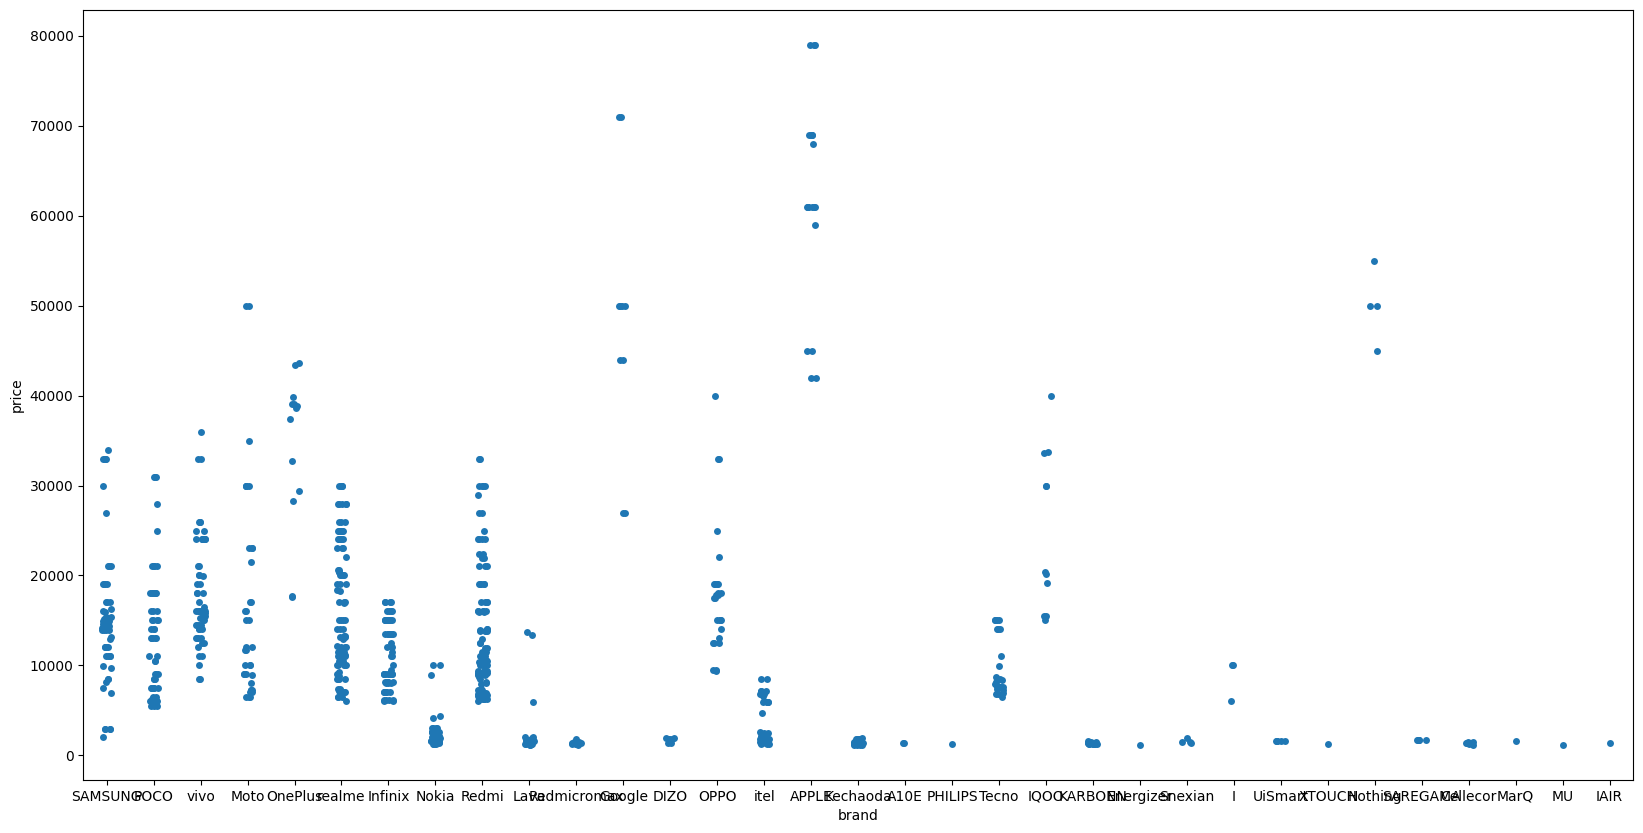

In [64]:
plt.figure(figsize=(20,10))
sns.stripplot(x = mobile_df.brand, y = mobile_df.price)

In [65]:
mobile_df.head()

,index,productname,price,specifications,rating,pagenumber,brand,RAM,storage,colour
0,0,"SAMSUNG Galaxy F13 (Nightsky Green, 64 GB)",10999.0,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,4.3,1,SAMSUNG,4 GB RAM,64 GB ROM,Green
1,1,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",10999.0,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,4.3,1,SAMSUNG,4 GB RAM,64 GB ROM,Copper
2,2,"SAMSUNG Galaxy F04 (Jade Purple, 64 GB)",8499.0,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,4.2,1,SAMSUNG,4 GB RAM,64 GB ROM,Purple
3,3,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)",10999.0,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,4.3,1,SAMSUNG,4 GB RAM,64 GB ROM,Blue
4,4,"POCO C51 (Royal Blue, 64 GB)",6499.0,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,4.1,1,POCO,4 GB RAM,64 GB ROM,Blue


In [66]:
mobile_df['specifications'][5]

'6 GB RAM | 128 GB ROM | Expandable Upto 1 TB17.04 cm (6.71 inch) HD+ Display50MP Dual Rear Camera | 5MP Front Camera5000 mAh BatteryMediatek Helio G85 Processor1 Year Manufacturer Warranty for Phone and 6 Months Warranty for In the Box Accessories'